In [1]:
import pandas as pd
import os
import glob

# Data uploading

In [4]:
# Folder with all CSV-files
folder_path = "C:/Users/user/Desktop/TimeSeriesData/Total_net"

# Find all CSV files
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Read and unite CSV files
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save into 1 CSV-file
combined_df.to_csv('объединенный_файл.csv', index=False)

# download file
df1 = pd.read_csv('объединенный_файл.csv')

df1 = df1.iloc[1:]

# Working with first column (divide it into 2 columns with Date and Time)
df1['Date (GMT+1)'] = pd.to_datetime(df1['Date (GMT+1)'], utc=True)

df1['Date'] = df1['Date (GMT+1)'].dt.date       # Только дата
df1['Time'] = df1['Date (GMT+1)'].dt.time       # Только время

df1.drop(columns=['Date (GMT+1)'], inplace=True)
df1.drop(columns=['Solar'], inplace=True)



# Save
df1.to_csv('с_разделенными_датой_и_временем.csv', index=False)

print(df1.head())
print(len(df1))

C:\Users\user\AppData\Local\Temp\ipykernel_37796\3652845830.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
C:\Users\user\AppData\Local\Temp\ipykernel_37796\3652845830.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
C:\Users\user\AppData\Local\Temp\ipykernel_37796\3652845830.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
C:\Users\user\AppData\Local\Temp\ipykernel_37796\3652845830.py:8: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f

  Nuclear Hydro Run-of-River Biomass Fossil brown coal / lignite  \
1  8094.9             1591.9  5396.8                        9410   
2  8081.4             1586.9    5390                      9434.5   
3  8081.1             1581.2  5372.1                        9467   
4  8076.3             1581.3  5372.3                      9479.7   
5  8089.6             1581.8  5369.3                      9540.4   

  Fossil hard coal Fossil oil Fossil gas Geothermal Hydro water reservoir  \
1           2200.5      503.8     9408.1       27.9                 451.2   
2           2159.4      503.9     9209.9       27.9                 385.7   
3           2153.1      503.9     9069.3       27.9                 274.5   
4           2186.7      503.9     8956.1       27.8                  98.7   
5           2145.8      503.9     8659.5       27.9                 244.1   

  Hydro pumped storage  Others   Waste Wind offshore Wind onshore  \
1               1026.3  1630.5  1399.9         501.3       

In [5]:
# Folder with all CSV-files
folder_path2 = "C:/Users/user/Desktop/TimeSeriesData/Forecast"

# Find all CSV files
csv_files2 = glob.glob(os.path.join(folder_path2, '*.csv'))

# Read and unite CSV files
df_list2 = [pd.read_csv(file) for file in csv_files2]
combined_df2 = pd.concat(df_list2, ignore_index=True)

# Save into 1 CSV-file
combined_df2.to_csv('объединенный_файл2.csv', index=False)

# download file
df2 = pd.read_csv('объединенный_файл2.csv')

df2 = df2.iloc[1:187300]

# Working with first column (we don't need it here)
df2.drop(columns=['Date (GMT+1)'], inplace=True)

# Save
df2.to_csv('с_разделенными_датой_и_временем.csv', index=False)

print(df2.head())
print(len(df2))

  Solar Solar forecast (Day-Ahead, D-1 18:00) Solar forecast (Intraday, 8:00)  \
1   0.1                                     0                               0   
2   0.1                                     0                               0   
3   0.1                                     0                               0   
4   0.1                                     0                               0   
5   0.1                                     0                               0   

  Solar forecast (Current)  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
5                      NaN  
187299


In [6]:
final_df = pd.concat([df1, df2], axis=1)
final_df.to_csv('объединенный_по_колонкам.csv', index=False)
final_df.head()

# Delete two columns where we don't have enough information
final_df.drop(columns=['Solar forecast (Current)', 'Fossil coal-derived gas', 'Solar forecast (Intraday, 8:00)'], inplace=True)
final_df.head()
final_df = final_df[~final_df.isin(['Power (MW)']).any(axis=1)]

# Germany doesn't have Nuclear energy
final_df.drop(columns=['Nuclear'], inplace=True)

In [7]:
column_list = final_df.columns.tolist()
print(column_list)

['Hydro Run-of-River', 'Biomass', 'Fossil brown coal / lignite', 'Fossil hard coal', 'Fossil oil', 'Fossil gas', 'Geothermal', 'Hydro water reservoir', 'Hydro pumped storage', 'Others', 'Waste', 'Wind offshore', 'Wind onshore', 'Load (incl. self-consumption)', 'Date', 'Time', 'Solar', 'Solar forecast (Day-Ahead, D-1 18:00)']


In [9]:
# We don't need offshore and onshore, just summ it
final_df['Wind offshore'] = pd.to_numeric(final_df['Wind offshore'], errors='coerce')
final_df['Wind onshore'] = pd.to_numeric(final_df['Wind onshore'], errors='coerce')

final_df['Wind'] = final_df['Wind offshore'] + final_df['Wind onshore']
final_df.drop(columns=['Wind offshore','Wind onshore'], inplace=True)
print(final_df)

       Hydro Run-of-River Biomass Fossil brown coal / lignite  \
1                  1591.9  5396.8                        9410   
2                  1586.9    5390                      9434.5   
3                  1581.2  5372.1                        9467   
4                  1581.3  5372.3                      9479.7   
5                  1581.8  5369.3                      9540.4   
...                   ...     ...                         ...   
187295             1666.2  4526.7                      7232.7   
187296             1666.2    4521                      7272.7   
187297             1670.8  4514.2                      6999.9   
187298             1662.8  4513.1                      6434.7   
187299             1646.6  4498.3                      5985.4   

       Fossil hard coal Fossil oil Fossil gas Geothermal  \
1                2200.5      503.8     9408.1       27.9   
2                2159.4      503.9     9209.9       27.9   
3                2153.1      503.9     

In [10]:
#check for NaN values

print(final_df.isna().mean() * 100)
df_clean = final_df.dropna(subset=['Load (incl. self-consumption)'])

Hydro Run-of-River                       0.000000
Biomass                                  0.000000
Fossil brown coal / lignite              0.000000
Fossil hard coal                         0.000000
Fossil oil                               0.000000
Fossil gas                               0.000000
Geothermal                               0.000000
Hydro water reservoir                    0.000000
Hydro pumped storage                     0.000000
Others                                   0.000000
Waste                                    0.000000
Load (incl. self-consumption)            0.000534
Date                                     0.000000
Time                                     0.000000
Solar                                    0.000000
Solar forecast (Day-Ahead, D-1 18:00)    0.000000
Wind                                     0.000000
dtype: float64


In [11]:
print(df_clean.isna().mean() * 100)


Hydro Run-of-River                       0.0
Biomass                                  0.0
Fossil brown coal / lignite              0.0
Fossil hard coal                         0.0
Fossil oil                               0.0
Fossil gas                               0.0
Geothermal                               0.0
Hydro water reservoir                    0.0
Hydro pumped storage                     0.0
Others                                   0.0
Waste                                    0.0
Load (incl. self-consumption)            0.0
Date                                     0.0
Time                                     0.0
Solar                                    0.0
Solar forecast (Day-Ahead, D-1 18:00)    0.0
Wind                                     0.0
dtype: float64


In [12]:
# make a copy
dfd = df_clean.copy()

# === ШАГ 1. Making new index (DateTime format) and converting 'Load' column into numerical type ===
dfd['Datetime'] = pd.to_datetime(dfd['Date'].astype(str) + ' ' + dfd['Time'].astype(str))
dfd.set_index('Datetime', inplace=True)
dfd.sort_index(inplace=True)
dfd['Load (incl. self-consumption)'] = pd.to_numeric(dfd['Load (incl. self-consumption)'], errors='coerce')

dfd.head()

# Descriptive Statistics

## Corr matrix

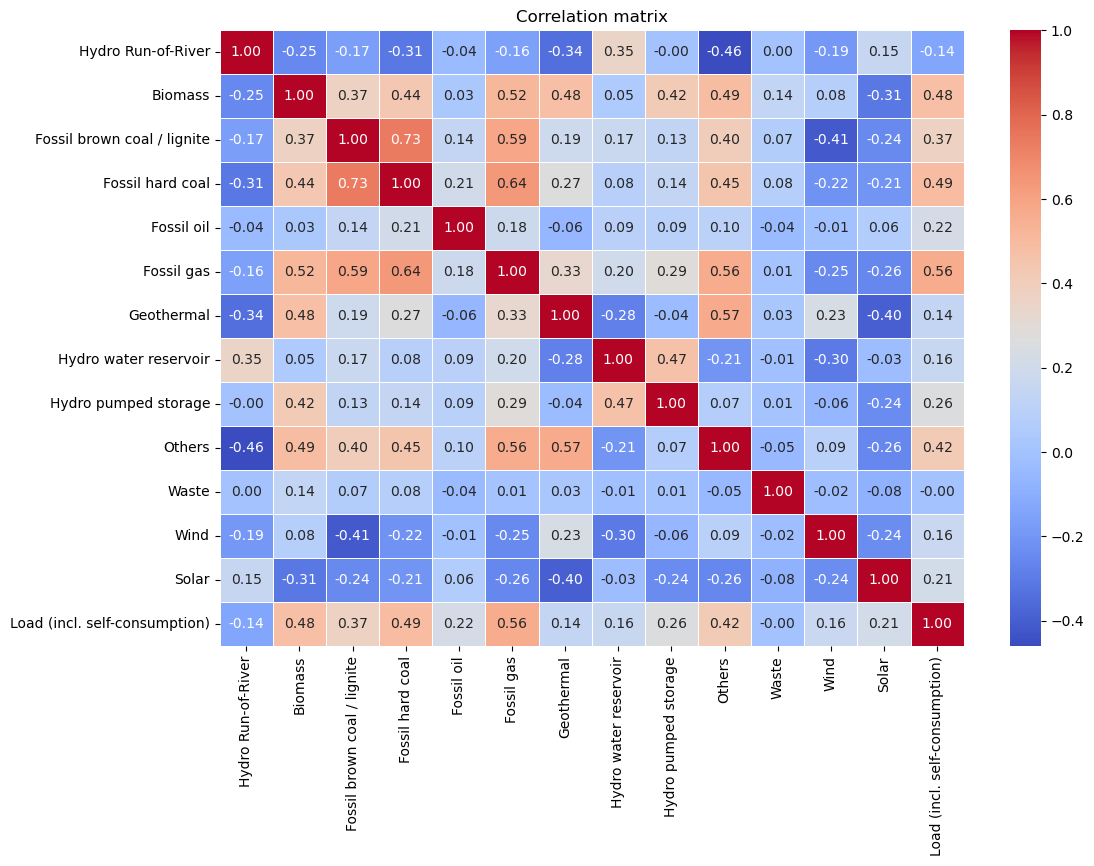

In [25]:
# We have too many variables, check which are correlated

corr = dfd[['Hydro Run-of-River', 'Biomass', 'Fossil brown coal / lignite', 'Fossil hard coal', 'Fossil oil', 'Fossil gas', 'Geothermal', 'Hydro water reservoir', 'Hydro pumped storage', 'Others', 'Waste', 'Wind', 'Solar', 'Load (incl. self-consumption)']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

## Yearly data with average daily load

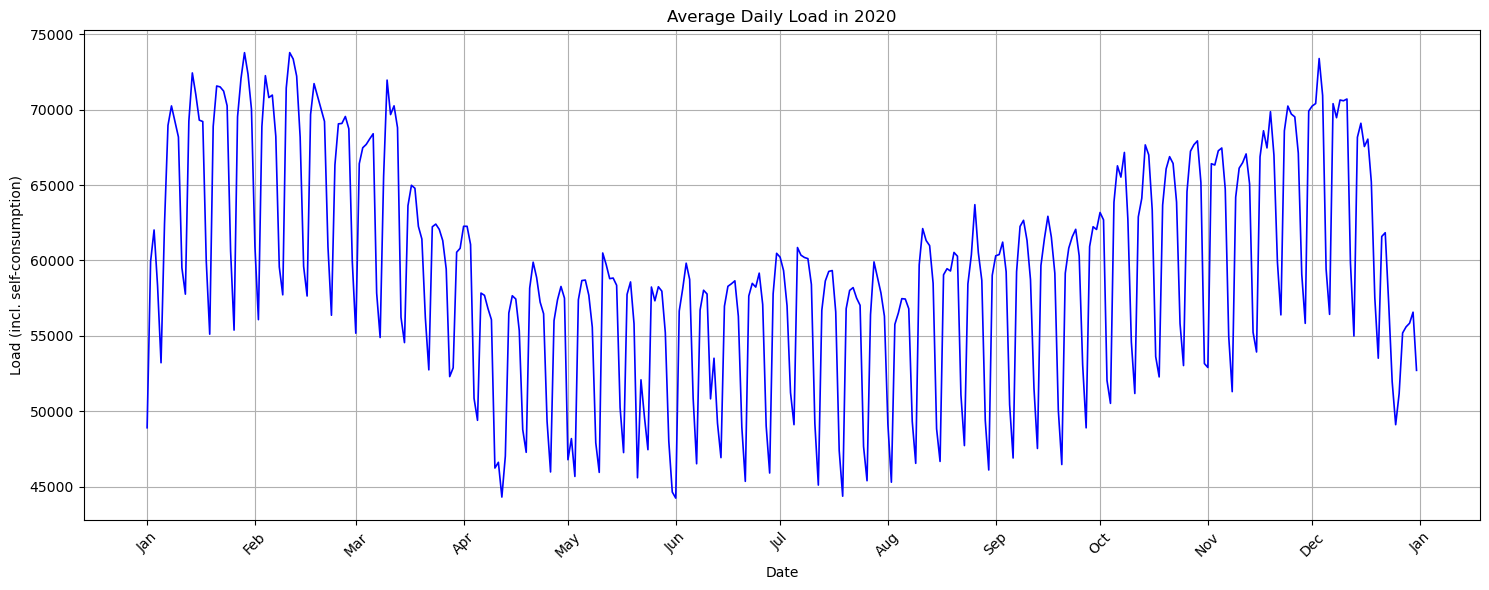

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Убедимся, что индекс — datetime
dfd.index = pd.to_datetime(dfd.index)


# Выбираем данные за 2020 год
year = '2020'
yearly_data = dfd.loc[year]

# Ресемплирование по дням — средняя нагрузка за день
daily_avg_load = yearly_data['Load (incl. self-consumption)'].resample('D').mean()

# Построение графика
plt.figure(figsize=(15, 6))
plt.plot(daily_avg_load.index, daily_avg_load, color='blue', linewidth=1.2)

# Настройки осей и сетки
plt.title(f"Average Daily Load in {year}")
plt.xlabel("Date")
plt.ylabel("Load (incl. self-consumption)")
plt.grid(True)

# Форматирование дат по X-оси (месяцы)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Monthly data with Average Hourly load

C:\Users\user\AppData\Local\Temp\ipykernel_37796\1137631507.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = week_data['Load (incl. self-consumption)'].resample('H').mean()


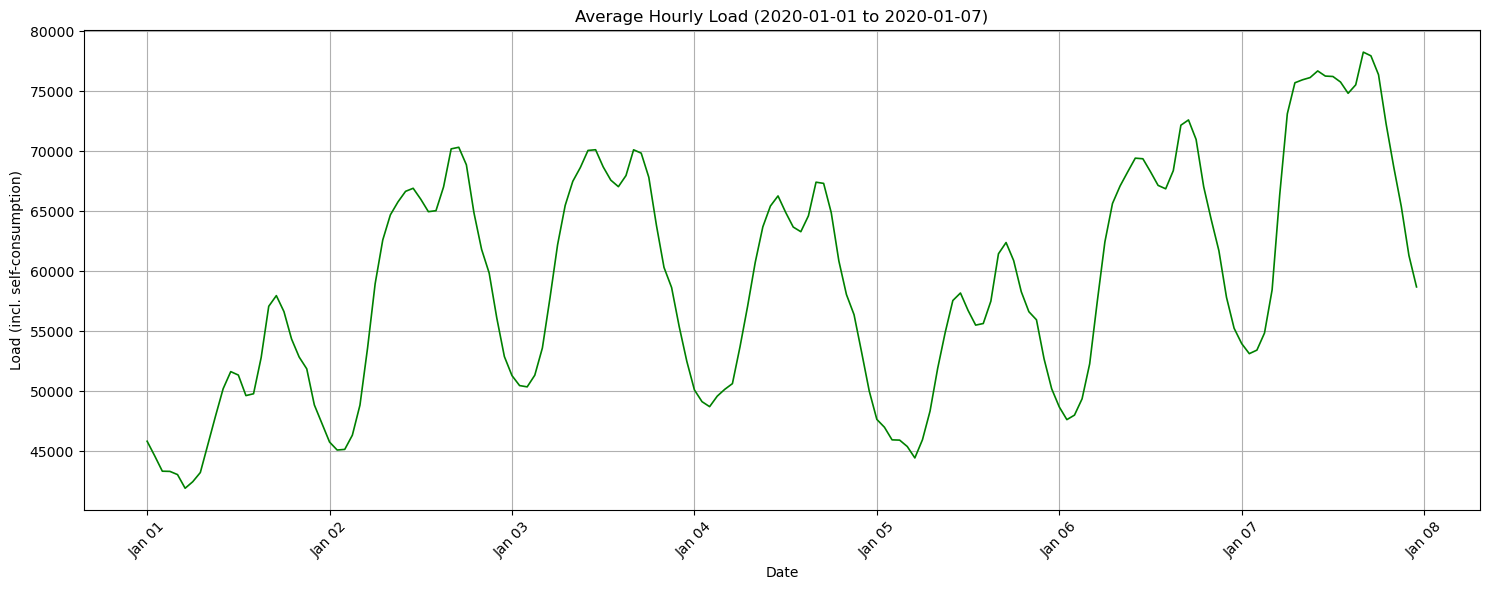

In [31]:
# Фильтрация по дате
week_data = dfd.loc['2020-01-01':'2020-01-07']

# Ресемплируем по часу для сглаживания
hourly_avg = week_data['Load (incl. self-consumption)'].resample('H').mean()

# Построение графика
plt.figure(figsize=(15, 6))
plt.plot(hourly_avg.index, hourly_avg, color='green', linewidth=1.2)

plt.title("Average Hourly Load (2020-01-01 to 2020-01-07)")
plt.xlabel("Date")
plt.ylabel("Load (incl. self-consumption)")
plt.grid(True)

# Отображение дней на оси X
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Daily data

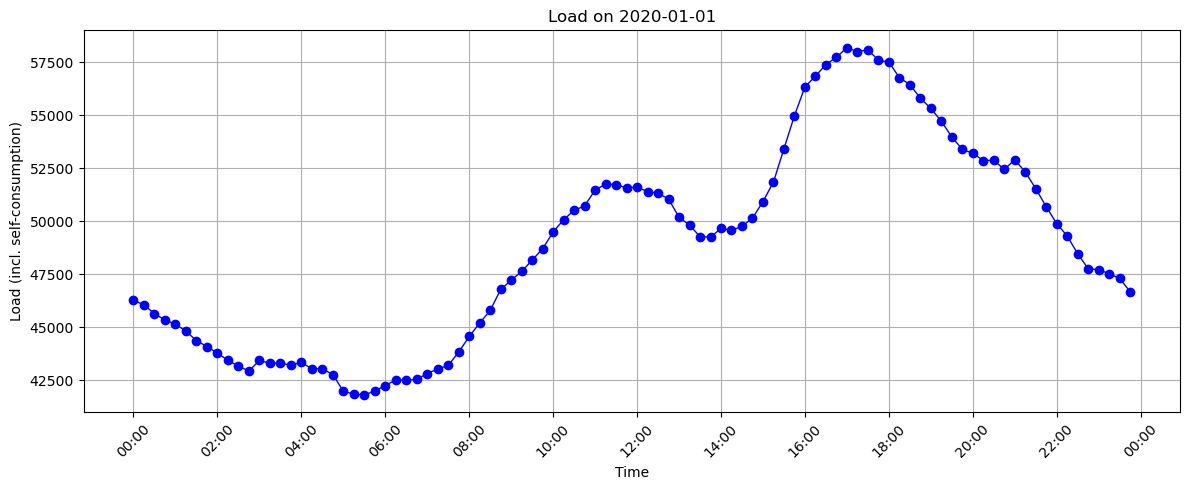

In [33]:
day = '2020-01-01'
day_data = dfd.loc[day]

# Построение графика
plt.figure(figsize=(12, 5))
plt.plot(day_data.index, day_data['Load (incl. self-consumption)'], color='blue', marker='o', linewidth=1)

plt.title(f"Load on {day}")
plt.xlabel("Time")
plt.ylabel("Load (incl. self-consumption)")
plt.grid(True)

# Формат времени на оси X
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SARIMAX

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
# Загрузите данные (предположим, что в df уже находятся ваши данные)
df = dfd.copy()
df = df.tail(2000)


# === ШАГ 2. Извлечение временных признаков ===
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['is_weekend'] = (df.index.weekday >= 5).astype(int)
df = df.apply(pd.to_numeric, errors='coerce')

# === ШАГ 3. Целевая переменная и экзогенные признаки ===
target_col = 'Load (incl. self-consumption)'

exog_vars = df[['Fossil gas', 'Fossil hard coal', 'Biomass']]
#exog_vars = df.drop(columns=['Date', 'Time', target_col,])  # удалим нечисловые и целевую
y = df[target_col]

In [53]:
print(len(df))

2000


In [55]:
# === ШАГ 4. Разделение на train/test (например, 80/20) ===
split_index = int(len(df) * 0.8)
y_train, y_test = y[:split_index], y[split_index:]
exog_train, exog_test = exog_vars[:split_index], exog_vars[split_index:]

In [57]:
# === ШАГ 5. Масштабирование экзогенных признаков ===
scaler = StandardScaler()
exog_train_scaled = scaler.fit_transform(exog_train)
exog_test_scaled = scaler.transform(exog_test)

In [59]:
# === ШАГ 6. Обучение модели SARIMAX (без автоподбора параметров) ===
model = SARIMAX(
    y_train,
    exog=exog_train_scaled,
    order=(1, 1, 1),                # ARIMA параметры (p, d, q)
    seasonal_order=(1, 1, 1, 96),   # сезонные параметры (P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)
print(results.summary())


C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:      Load (incl. self-consumption)   No. Observations:                 1600
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 96)   Log Likelihood              -10587.278
Date:                            Tue, 06 May 2025   AIC                          21190.555
Time:                                    22:15:14   BIC                          21232.537
Sample:                                04-14-2025   HQIC                         21206.246
                                     - 04-30-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           263.9616    127.169      2.076      0.038      14.715     513.208
x2          1016.6985    208.076   

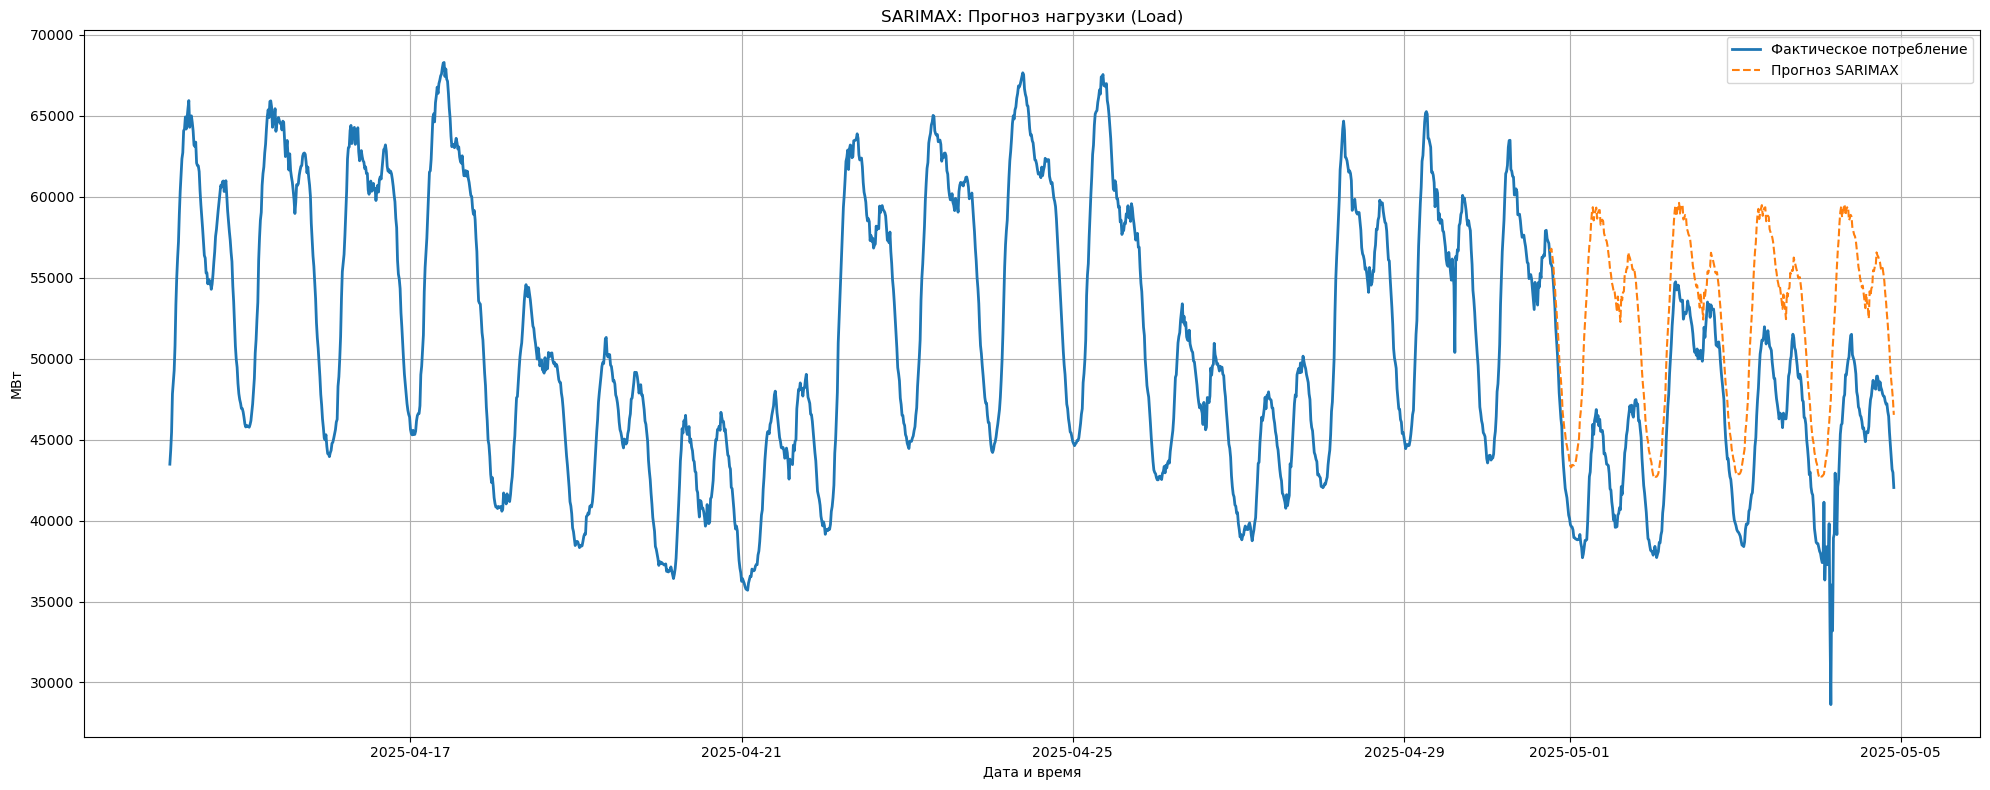

In [61]:
# === ШАГ 7. Прогноз и визуализация ===
forecast = results.predict(
    start=len(y_train),
    end=len(y) - 1,
    exog=exog_test_scaled
)

plt.figure(figsize=(20, 8))
plt.plot(y.index, y, label='Фактическое потребление', linewidth=2)
plt.plot(y_test.index, forecast, label='Прогноз SARIMAX', linestyle='--')
plt.title('SARIMAX: Прогноз нагрузки (Load)')
plt.xlabel('Дата и время')
plt.ylabel('МВт')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


y_true = df[target_col][-400:]
# MAE
mae = mean_absolute_error(y_true, forecast)

# MSE
mse = mean_squared_error(y_true, forecast)

# RMSE
rmse = np.sqrt(mse)

# MAPE
mape = np.mean(np.abs((y_true - forecast) / y_true)) * 100

print(f" mae:{round(mae,1)} mse:{round(mse,1)} rmse:{round(rmse,1)}")

 mae:6959.4 mse:61648781.6 rmse:7851.7


# GARCH